### Importing Data

In [173]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Importing the dataset
df = pd.read_csv("Country-data.csv")

### Understanding Data

In [175]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [177]:
round((df.isnull().sum()/len(df.index))*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### There are no null or missing values in the data

In [178]:
# checking for outliers
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [179]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

#### we see outliers in the columns such as child_mort, exports, imports, income, inflation etc. We should not do outlier treatment in this case as it essentially tries to modify the factual data.

### Feature Standardisation

In [180]:
# Normalising continuous features
df_new = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [181]:
normalized_df=(df_new-df_new.mean())/df_new.std()
df = df.drop(['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], 1)
df = pd.concat([df,normalized_df],axis=1)
df.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.287660 -1.134867  0.278251 -0.082208 -0.805822   
1              Albania   -0.537333 -0.478220 -0.096725  0.070624 -0.374243   
2              Algeria   -0.272015 -0.098824 -0.963176 -0.639838 -0.220182   
3               Angola    2.001787  0.773056 -1.443729 -0.164820 -0.583289   
4  Antigua and Barbuda   -0.693548  0.160186 -0.286034  0.496076  0.101427   

   inflation  life_expec  total_fer      gdpp  
0   0.156864   -1.614237   1.897176 -0.677143  
1  -0.311411    0.645924  -0.857394 -0.484167  
2   0.786908    0.668413  -0.038289 -0.463980  
3   1.382894   -1.175698   2.121770 -0.514720  
4  -0.599944    0.702147  -0.540321 -0.041692

### Performing PCA

In [182]:
# Removing string feature 'country' from the dataset to perform PCA
df_pca = df.drop('country', axis=1)
df_country = df['country']

In [183]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [184]:
#Doing the PCA on the data
pca.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [185]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

#### Looking at the screeplot to assess the number of needed principal components

In [186]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

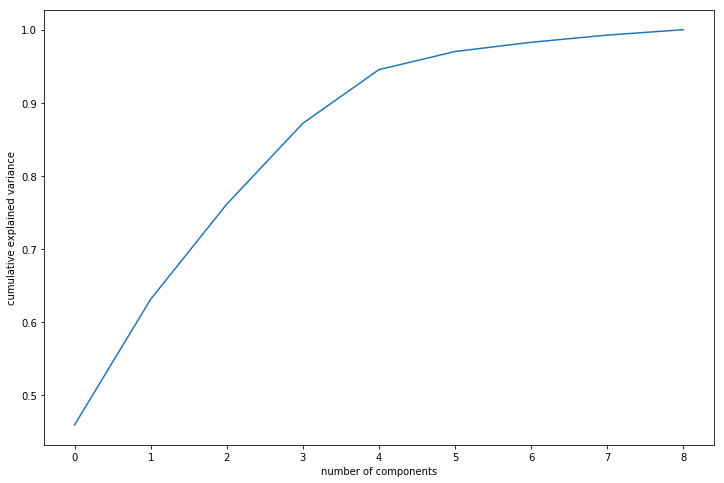

In [187]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#### It can observed that about 95% variance is explained by 5 components. So we choose 5 components

In [188]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

#### Basis transformation - getting the data onto our PCs

In [189]:
df_pca = pca_final.fit_transform(df_pca)
df_pca.shape

(167, 5)

In [190]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

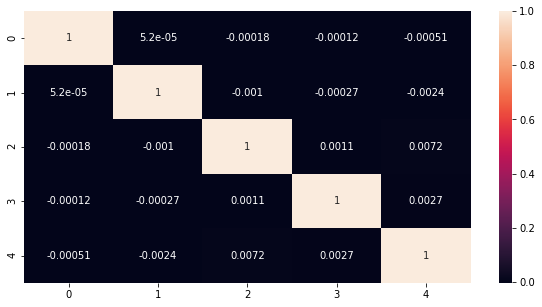

In [191]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

#### we can see that there is no correlation among the components. PCA has done its job.

### Applying clustering on the data

In [192]:
df_pca

array([[-2.90426527e+00,  9.16936772e-02, -7.19079824e-01,
         9.98833692e-01, -1.46324633e-01],
       [ 4.28580914e-01, -5.87605765e-01, -3.27625666e-01,
        -1.16152055e+00,  1.52745853e-01],
       [-2.84433307e-01, -4.50782980e-01,  1.22835623e+00,
        -8.55194999e-01,  1.90653759e-01],
       [-2.92391984e+00,  1.69367677e+00,  1.52050306e+00,
         8.53029988e-01, -2.14133956e-01],
       [ 1.03027289e+00,  1.33451378e-01, -2.16049426e-01,
        -8.44099006e-01, -1.92606979e-01],
       [ 2.28217067e-02, -1.76741994e+00,  8.61907325e-01,
        -3.66364323e-02,  9.94903057e-01],
       [-1.01158926e-01, -5.65616877e-01,  2.47363000e-01,
        -1.46162757e+00, -8.55745583e-02],
       [ 2.33513030e+00, -1.98374355e+00,  1.98198980e-01,
         1.11007405e+00, -7.08522888e-01],
       [ 2.96492402e+00, -7.32947745e-01, -5.26700304e-01,
         1.19749986e+00,  7.99261337e-02],
       [-1.80759205e-01, -3.95704713e-01,  8.65795034e-01,
        -4.33896455e-01

In [193]:
df_pca = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

In [194]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
PC1    167 non-null float64
PC2    167 non-null float64
PC3    167 non-null float64
PC4    167 non-null float64
PC5    167 non-null float64
dtypes: float64(5)
memory usage: 6.6 KB


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [195]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [196]:
hopkins(df_pca)

0.8202917474592437

#### since hopkins statistic is 0.81 which is in the range of 0.7 to 1, the data has a good cluster tendency

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [197]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

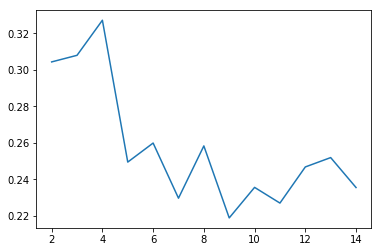

In [198]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### From silhouette analysis, we can find that k=4 is ideal value for k 

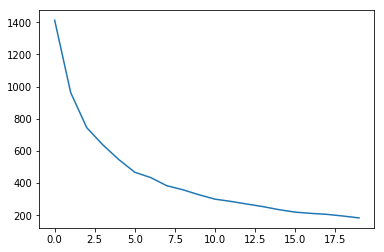

In [199]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### Performing KMeans with k=4

In [200]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [201]:
model_clus5.labels_

array([1, 3, 3, 1, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3,
       3, 0, 3, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0,
       0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 1, 1, 0, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       0, 0, 1, 1, 0, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 2, 3, 0, 3, 1, 0, 0, 3, 3, 1, 3, 0, 0, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1])

In [202]:
df_clusters = pd.concat([df, pd.Series(model_clus5.labels_)], axis=1)
df_clusters.columns = ['country', 'child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp','clusterId']

In [203]:
df_clusters

country  child_mort   exports    health   imports  \
0                       Afghanistan    1.287660 -1.134867  0.278251 -0.082208   
1                           Albania   -0.537333 -0.478220 -0.096725  0.070624   
2                           Algeria   -0.272015 -0.098824 -0.963176 -0.639838   
3                            Angola    2.001787  0.773056 -1.443729 -0.164820   
4               Antigua and Barbuda   -0.693548  0.160186 -0.286034  0.496076   
5                         Argentina   -0.589405 -0.810191  0.467560 -1.275950   
6                           Armenia   -0.500139 -0.740879 -0.879444 -0.065685   
7                         Australia   -0.829927 -0.777359  0.696915 -1.073550   
8                           Austria   -0.842325  0.371772  1.523320  0.037580   
9                        Azerbaijan    0.023059  0.481213 -0.340642 -1.081812   
10                          Bahamas   -0.606762 -0.222858  0.391108 -0.131775   
11                          Bahrain   -0.735702  1.035715 -0.671932  0.165628   
12                       Bangladesh    0.275979 -0.915984 -1.199812 -1.036375   
13                         Barbados   -0.596843 -0.058696  0.420233  0.074755   
14                          Belarus   -0.812570  0.375420 -0.438937  0.727389   
15                          Belgium   -0.837366  1.287429  1.414103  1.148710   
16                           Belize   -0.482781  0.623487 -0.588200  0.438247   
17                            Benin    1.803418 -0.631438 -0.988660 -0.400264   
18                           Bhutan    0.109845  0.050745 -0.588200  0.983486   
19                          Bolivia    0.206550  0.003321 -0.719259 -0.520051   
20           Bosnia and Herzegovina   -0.777855 -0.416204  1.559725  0.182150   
21                         Botswana    0.352847  0.090873  0.540371  0.182150   
22                           Brazil   -0.457985 -1.109330  0.798850 -1.449435   
23                           Brunei   -0.688589  0.959106 -1.447369 -0.780278   
24                         Bulgaria   -0.681150  0.331644  0.019772  0.252370   
25                     Burkina Faso    1.927399 -0.799247 -0.027555 -0.714189   
26                          Burundi    1.371966 -1.174265  1.741753 -0.317652   
27                         Cambodia    0.151999  0.473917 -0.413453  0.520859   
28                         Cameroon    1.729030 -0.689806 -0.613683 -0.821584   
29                           Canada   -0.810090 -0.438092  1.632536 -0.656360   
..                              ...         ...       ...       ...       ...   
137                    South Africa    0.382602 -0.456332  0.773366 -0.805062   
138                     South Korea   -0.847284  0.302460  0.041616 -0.028510   
139                           Spain   -0.854723 -0.569421  0.991799 -0.829845   
140                       Sri Lanka   -0.671232 -0.784655 -1.410964 -0.829845   
141  St. Vincent and the Grenadines   -0.435669 -0.518349 -0.853960  0.421725   
142                           Sudan    0.952912 -0.781007 -0.180458 -1.226382   
143                        Suriname   -0.351362  0.415549  0.070740 -0.350696   
144                          Sweden   -0.874560  0.185722  1.024564 -0.255693   
145                     Switzerland   -0.837366  0.835073  1.705347  0.264762   
146                      Tajikistan    0.350367 -0.956113 -0.304237  0.483684   
147                        Tanzania    0.833891 -0.817488 -0.293315 -0.734842   
148                        Thailand   -0.579486  0.926274 -1.068752  0.574557   
149                     Timor-Leste    0.603287 -1.419413  0.838896 -0.788539   
150                            Togo    1.290139 -0.033160  0.303735  0.429986   
151                           Tonga   -0.517496 -1.047314 -0.635527  0.553904   
152                         Tunisia   -0.517496  0.342588 -0.220504  0.347374   
153                          Turkey   -0.475343 -0.755471 -0.027555 -0.883543   
154                    Turkmenistan    0.588410  1.283781 -

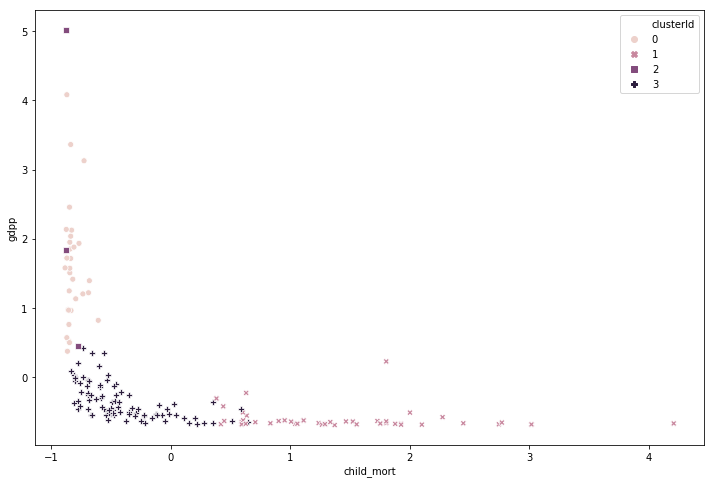

In [204]:
# Scatter plots with two variables: child_mort and gdpp
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='gdpp',style='clusterId', hue='clusterId',data=df_clusters)
plt.show()

#### we can observe from this graph that 
#### cluster 3  - high child_mort rate and low gdpp
#### cluster 2,4 - low child_mort and high gdpp
#### cluster 0,1 - moderate child_mort and gdpp

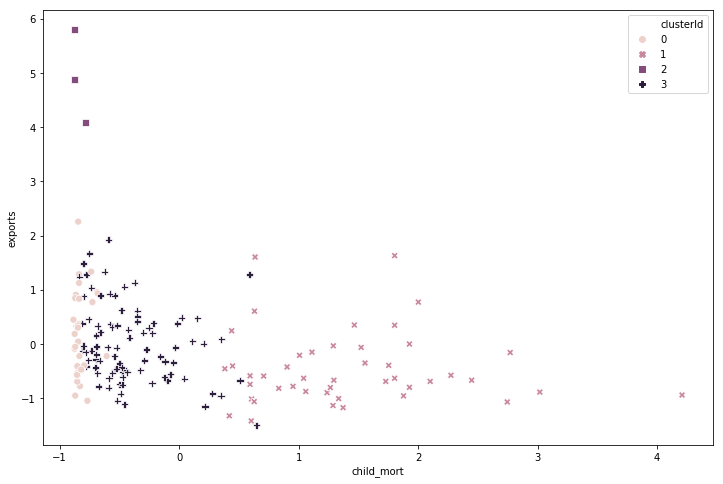

In [205]:
# Scatter plots with two variables: child_mort and exports
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='exports',style='clusterId', hue='clusterId',s=50,data=df_clusters)
plt.show()

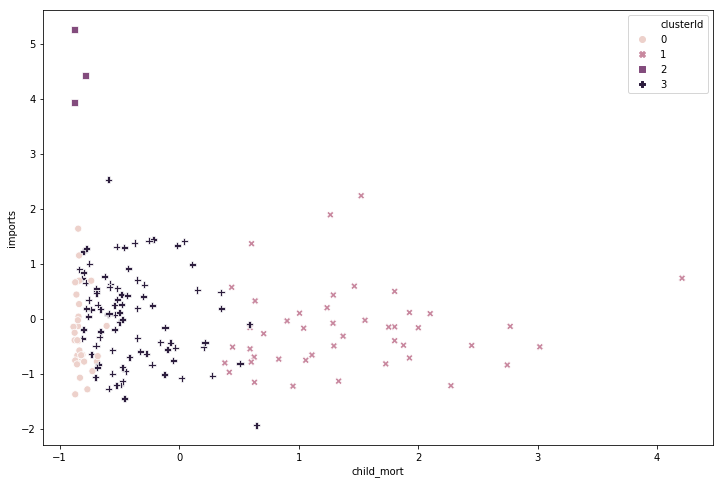

In [206]:
# Scatter plots with two variables: child_mort and imports
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='imports',style='clusterId', hue='clusterId',s=50,data=df_clusters)
plt.show()

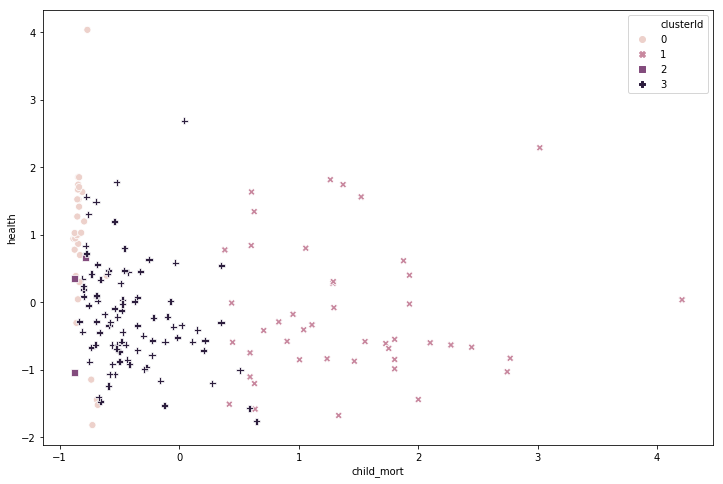

In [207]:
# Scatter plots with two variables: child_mort and health
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='health',style='clusterId', hue='clusterId',s=50,data=df_clusters)
plt.show()

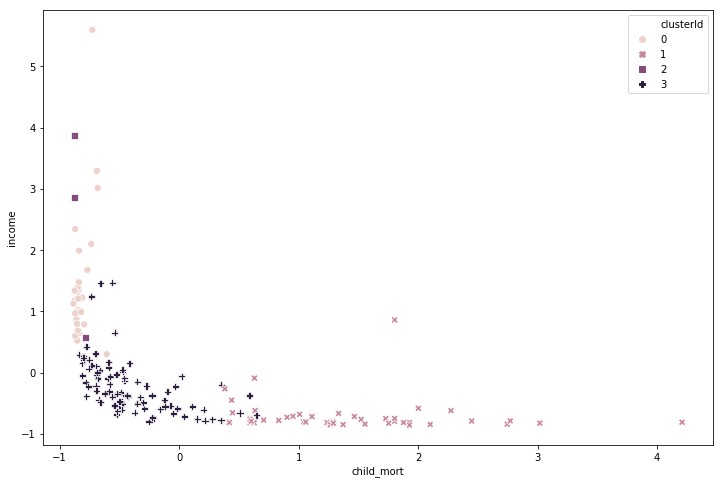

In [208]:
# Scatter plots with two variables: child_mort and income
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='income',style='clusterId', hue='clusterId',s=50, data=df_clusters)
plt.show()

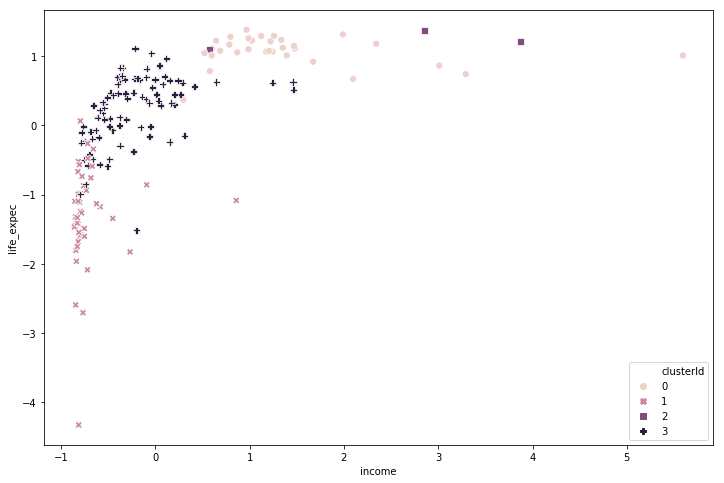

In [209]:
# Scatter plots with two variables: income and life_expec
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='income', y='life_expec',style='clusterId', hue='clusterId',s=50, data=df_clusters)
plt.show()

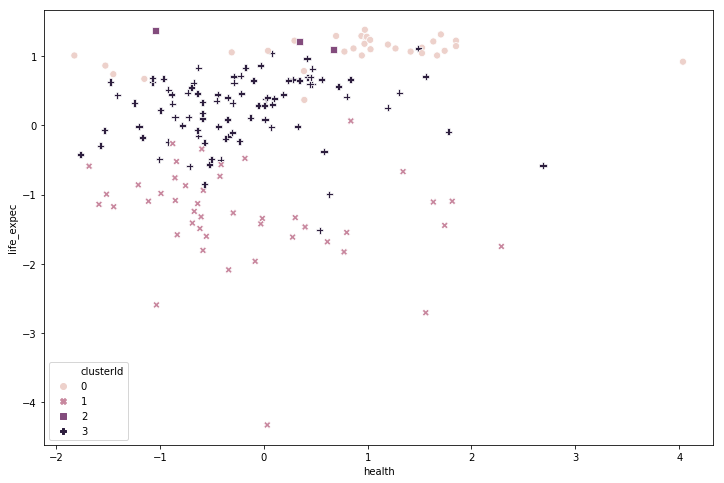

In [210]:
# Scatter plots with two variables: health and life_expec
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='health', y='life_expec',style='clusterId', hue='clusterId',s=50, data=df_clusters)
plt.show()

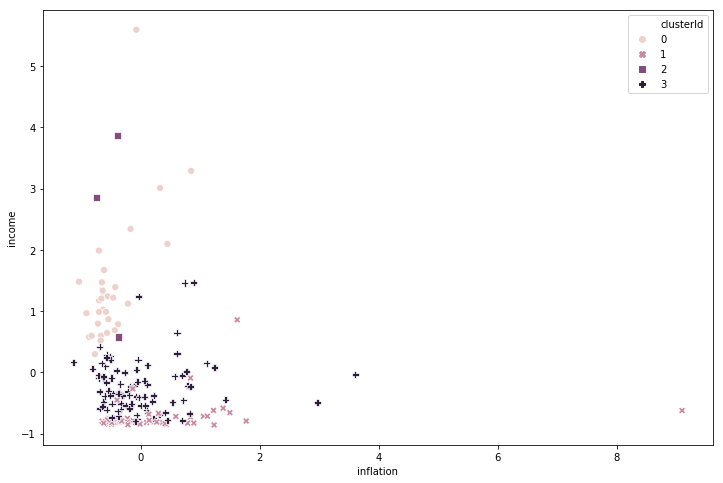

In [211]:
# Scatter plots with two variables: inflation and income
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='inflation', y='income',style='clusterId', hue='clusterId',s=50, data=df_clusters)
plt.show()

#### Visualizing the clusters against the Principal components

In [212]:
df_pca_kmeansclusters = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)
df_pca_kmeansclusters.columns=['PC1','PC2','PC3','PC4','PC5','clusterid']

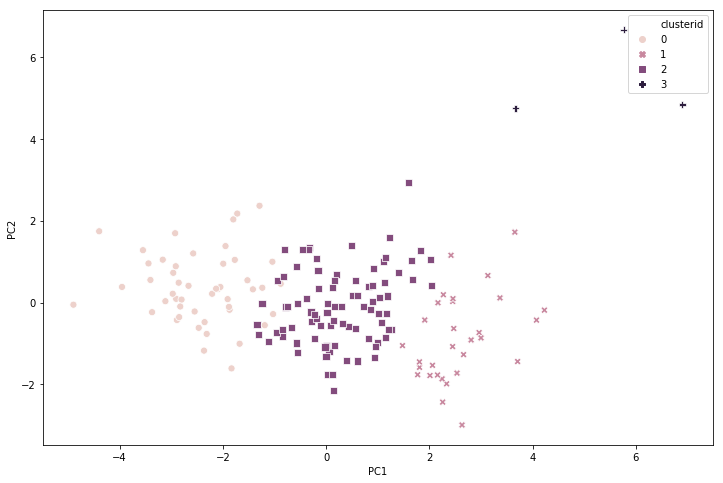

In [213]:
# Scatter plots with two variables: PC1 and PC2
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1', y='PC2',style='clusterid', hue='clusterid',s=50, data=df_pca_kmeansclusters)
plt.show()

#### Looks like PC1 is able to capture high income and PC2 is capturing high child_mort

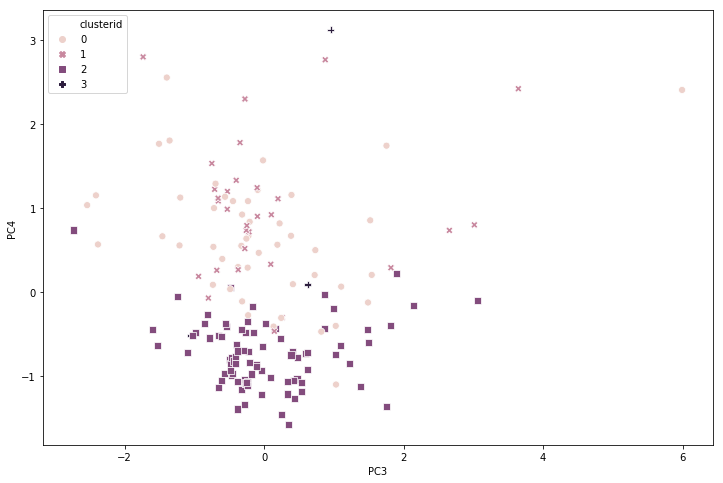

In [214]:
# Scatter plots with two variables: PC1 and PC2
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC3', y='PC4',style='clusterid', hue='clusterid',s=50, data=df_pca_kmeansclusters)
plt.show()

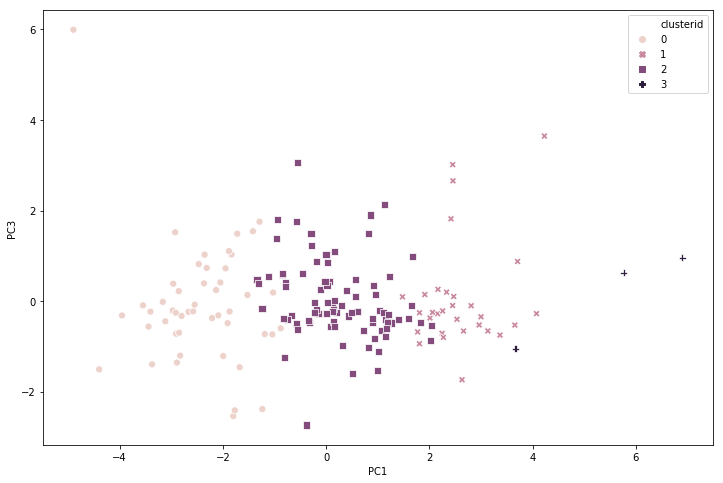

In [215]:
# Scatter plots with two variables: PC1 and PC3
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1', y='PC3',style='clusterid', hue='clusterid',s=50, data=df_pca_kmeansclusters)
plt.show()

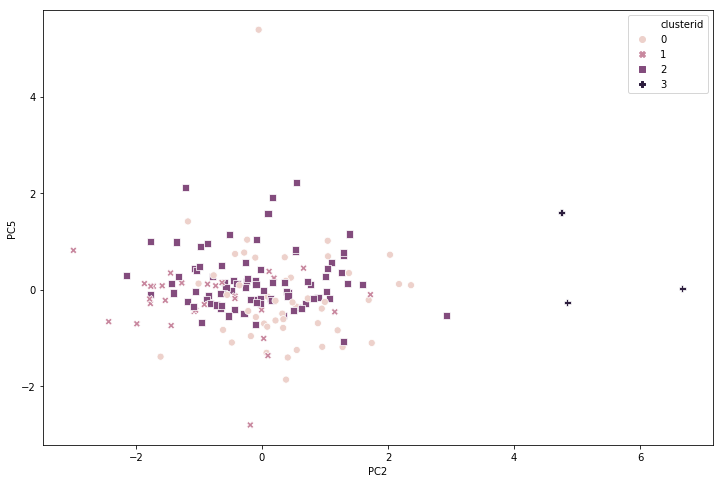

In [216]:
# Scatter plots with two variables: PC2 and PC5
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC2', y='PC5',style='clusterid', hue='clusterid',s=50, data=df_pca_kmeansclusters)
plt.show()

### Performing Hierarchical clustering

In [217]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

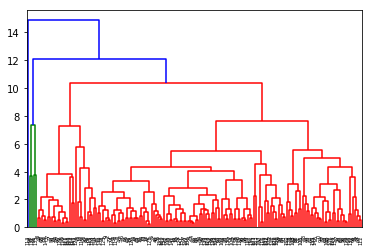

In [218]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Choosing 4 clusters similar to kmeans

In [219]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df, clusterCut], axis=1)
df_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp','clusterId']

In [220]:
df_hc

country  child_mort   exports    health   imports  \
0                       Afghanistan    1.287660 -1.134867  0.278251 -0.082208   
1                           Albania   -0.537333 -0.478220 -0.096725  0.070624   
2                           Algeria   -0.272015 -0.098824 -0.963176 -0.639838   
3                            Angola    2.001787  0.773056 -1.443729 -0.164820   
4               Antigua and Barbuda   -0.693548  0.160186 -0.286034  0.496076   
5                         Argentina   -0.589405 -0.810191  0.467560 -1.275950   
6                           Armenia   -0.500139 -0.740879 -0.879444 -0.065685   
7                         Australia   -0.829927 -0.777359  0.696915 -1.073550   
8                           Austria   -0.842325  0.371772  1.523320  0.037580   
9                        Azerbaijan    0.023059  0.481213 -0.340642 -1.081812   
10                          Bahamas   -0.606762 -0.222858  0.391108 -0.131775   
11                          Bahrain   -0.735702  1.035715 -0.671932  0.165628   
12                       Bangladesh    0.275979 -0.915984 -1.199812 -1.036375   
13                         Barbados   -0.596843 -0.058696  0.420233  0.074755   
14                          Belarus   -0.812570  0.375420 -0.438937  0.727389   
15                          Belgium   -0.837366  1.287429  1.414103  1.148710   
16                           Belize   -0.482781  0.623487 -0.588200  0.438247   
17                            Benin    1.803418 -0.631438 -0.988660 -0.400264   
18                           Bhutan    0.109845  0.050745 -0.588200  0.983486   
19                          Bolivia    0.206550  0.003321 -0.719259 -0.520051   
20           Bosnia and Herzegovina   -0.777855 -0.416204  1.559725  0.182150   
21                         Botswana    0.352847  0.090873  0.540371  0.182150   
22                           Brazil   -0.457985 -1.109330  0.798850 -1.449435   
23                           Brunei   -0.688589  0.959106 -1.447369 -0.780278   
24                         Bulgaria   -0.681150  0.331644  0.019772  0.252370   
25                     Burkina Faso    1.927399 -0.799247 -0.027555 -0.714189   
26                          Burundi    1.371966 -1.174265  1.741753 -0.317652   
27                         Cambodia    0.151999  0.473917 -0.413453  0.520859   
28                         Cameroon    1.729030 -0.689806 -0.613683 -0.821584   
29                           Canada   -0.810090 -0.438092  1.632536 -0.656360   
..                              ...         ...       ...       ...       ...   
137                    South Africa    0.382602 -0.456332  0.773366 -0.805062   
138                     South Korea   -0.847284  0.302460  0.041616 -0.028510   
139                           Spain   -0.854723 -0.569421  0.991799 -0.829845   
140                       Sri Lanka   -0.671232 -0.784655 -1.410964 -0.829845   
141  St. Vincent and the Grenadines   -0.435669 -0.518349 -0.853960  0.421725   
142                           Sudan    0.952912 -0.781007 -0.180458 -1.226382   
143                        Suriname   -0.351362  0.415549  0.070740 -0.350696   
144                          Sweden   -0.874560  0.185722  1.024564 -0.255693   
145                     Switzerland   -0.837366  0.835073  1.705347  0.264762   
146                      Tajikistan    0.350367 -0.956113 -0.304237  0.483684   
147                        Tanzania    0.833891 -0.817488 -0.293315 -0.734842   
148                        Thailand   -0.579486  0.926274 -1.068752  0.574557   
149                     Timor-Leste    0.603287 -1.419413  0.838896 -0.788539   
150                            Togo    1.290139 -0.033160  0.303735  0.429986   
151                           Tonga   -0.517496 -1.047314 -0.635527  0.553904   
152                         Tunisia   -0.517496  0.342588 -0.220504  0.347374   
153                          Turkey   -0.475343 -0.755471 -0.027555 -0.883543   
154                    Turkmenistan    0.588410  1.283781 -

In [221]:
df_hc.groupby('clusterId').count()

country  child_mort  exports  health  imports  income  inflation  \
clusterId                                                                     
0              132         132      132     132      132     132        132   
1               30          30       30      30       30      30         30   
2                4           4        4       4        4       4          4   
3                1           1        1       1        1       1          1   

           life_expec  total_fer  gdpp  
clusterId                               
0                 132        132   132  
1                  30         30    30  
2                   4          4     4  
3                   1          1     1

In [222]:
df_clusters.groupby('clusterId').count()

country  child_mort  exports  health  imports  income  inflation  \
clusterId                                                                     
0               32          32       32      32       32      32         32   
1               45          45       45      45       45      45         45   
2                3           3        3       3        3       3          3   
3               87          87       87      87       87      87         87   

           life_expec  total_fer  gdpp  
clusterId                               
0                  32         32    32  
1                  45         45    45  
2                   3          3     3  
3                  87         87    87

#### As we see, 4 clusters is not making any sense in case of hierarchical clustering. Let us try k=5

In [223]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_hc = pd.concat([df, clusterCut], axis=1)
df_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp','clusterId']

In [224]:
df_hc.groupby('clusterId').count()

country  child_mort  exports  health  imports  income  inflation  \
clusterId                                                                     
0               38          38       38      38       38      38         38   
1               94          94       94      94       94      94         94   
2               30          30       30      30       30      30         30   
3                4           4        4       4        4       4          4   
4                1           1        1       1        1       1          1   

           life_expec  total_fer  gdpp  
clusterId                               
0                  38         38    38  
1                  94         94    94  
2                  30         30    30  
3                   4          4     4  
4                   1          1     1

#### Now the distribution is similar to kmeans

#### Visualising clusters against original features

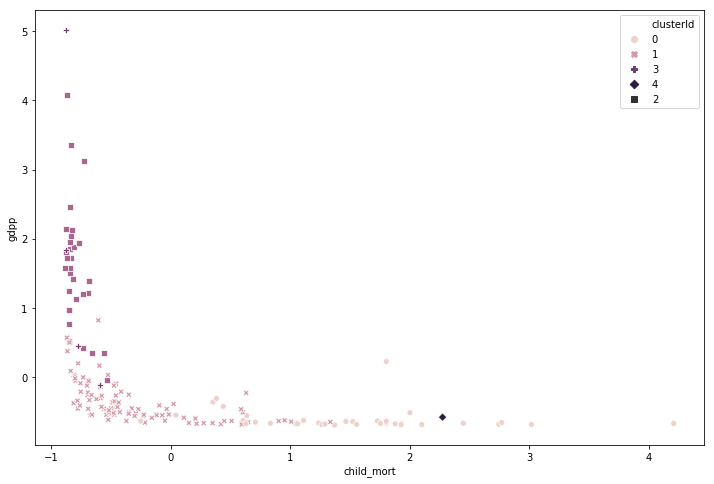

In [225]:
# Scatter plots with two variables: child_mort and gdpp
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='gdpp',style='clusterId', hue='clusterId',data=df_hc)
plt.show()

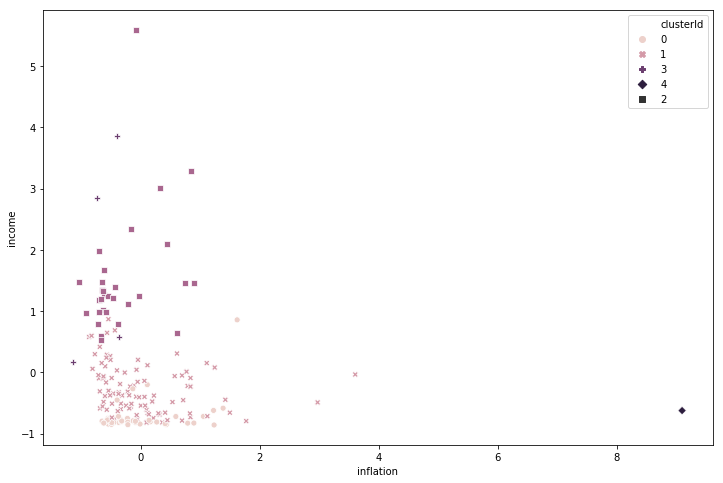

In [226]:
# Scatter plots with two variables: inflation and income
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='inflation', y='income',style='clusterId', hue='clusterId',data=df_hc)
plt.show()

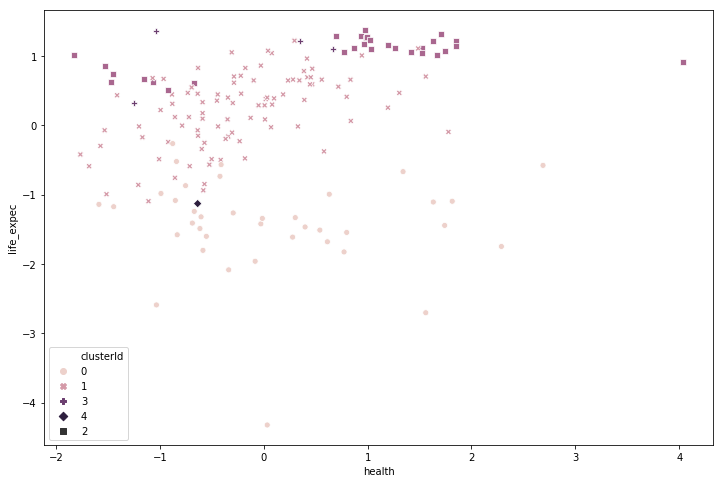

In [227]:
# Scatter plots with two variables: health and life_expec
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='health', y='life_expec',style='clusterId', hue='clusterId',data=df_hc)
plt.show()

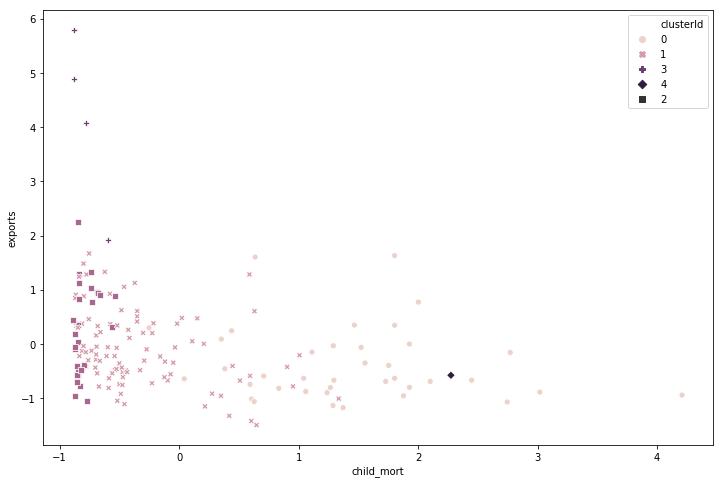

In [228]:
# Scatter plots with two variables: child_mort and exports
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='child_mort', y='exports',style='clusterId', hue='clusterId',data=df_hc)
plt.show()

#### From the results of kmeans and hierarchical clustering, we could find that cluster 0 in hierarchical clustering and cluster 1 in kmeans represent underdeveloped countries

In [229]:
hierar_underdeveloped = df_hc[df_hc['clusterId']==0]

In [230]:
hierar_underdeveloped.sort_values(['gdpp','child_mort','income','life_expec'],ascending=[True,False,True,True])

country  child_mort   exports    health   imports  \
26                    Burundi    1.371966 -1.174265  1.741753 -0.317652   
88                    Liberia    1.265343 -0.802895  1.814564  1.888086   
37           Congo, Dem. Rep.    1.927399 -0.000327  0.398390  0.111930   
112                     Niger    2.100972 -0.689806 -0.602762  0.091277   
132              Sierra Leone    3.018427 -0.886800  2.287835 -0.511790   
106                Mozambique    1.555458 -0.350539 -0.584559 -0.028510   
31   Central African Republic    2.745670 -1.069202 -1.032347 -0.842237   
94                     Malawi    1.295099 -0.667918 -0.082163 -0.495267   
150                      Togo    1.290139 -0.033160  0.303735  0.429986   
64              Guinea-Bissau    1.877807 -0.956113  0.613182 -0.482875   
0                 Afghanistan    1.287660 -1.134867  0.278251 -0.082208   
56                     Gambia    1.042178 -0.631438 -0.409813 -0.173081   
126                    Rwanda    0.628084 -1.061906  1.341292 -0.697666   
25               Burkina Faso    1.927399 -0.799247 -0.027555 -0.714189   
155                    Uganda    1.059536 -0.875856  0.798850 -0.755495   
63                     Guinea    1.753826 -0.394315 -0.686494 -0.152428   
66                      Haiti    4.208640 -0.941521  0.034335  0.735650   
147                  Tanzania    0.833891 -0.817488 -0.293315 -0.734842   
97                       Mali    2.448117 -0.667918 -0.668292 -0.487006   
17                      Benin    1.803418 -0.631438 -0.988660 -0.400264   
36                    Comoros    1.238068 -0.897744 -0.839398  0.198673   
32                       Chad    2.770466 -0.157193 -0.832116 -0.140036   
80                      Kenya    0.593369 -0.744527 -0.752024 -0.548965   
129                   Senegal    0.707431 -0.591309 -0.420734 -0.272215   
87                    Lesotho    1.523223 -0.062344  1.559725  2.235056   
99                 Mauritania    1.466192  0.349884 -0.875803  0.591079   
40              Cote d'Ivoire    1.803418  0.346236 -0.551794 -0.148297   
136           Solomon Islands   -0.252178  0.298812  0.631385  1.417198   
28                   Cameroon    1.729030 -0.689806 -0.613683 -0.821584   
166                    Zambia    1.111607 -0.149897 -0.337002 -0.660491   
81                   Kiribati    0.605767 -1.014481  1.632536  1.363500   
38                Congo, Rep.    0.635522  1.604808 -1.585710  0.322591   
101     Micronesia, Fed. Sts.    0.042896 -0.642382  2.688296  1.408937   
3                      Angola    2.001787  0.773056 -1.443729 -0.164820   
108                   Namibia    0.439633  0.244091 -0.012993  0.570426   
21                   Botswana    0.352847  0.090873  0.540371  0.182150   
137              South Africa    0.382602 -0.456332  0.773366 -0.805062   
49          Equatorial Guinea    1.803418  1.630345 -0.850319  0.496076   

       income  inflation  life_expec  total_fer      gdpp  clusterId  
26  -0.849706   0.427424   -1.445568   2.187827 -0.694711          0  
88  -0.853026  -0.218702   -1.096986   1.368722 -0.689473          0  
37  -0.857746   1.231533   -1.468058   2.372786 -0.689092          0  
112 -0.847112  -0.494937   -1.321878   3.000326 -0.688328          0  
132 -0.826052   0.890969   -1.749172   1.487624 -0.685545          0  
106 -0.841718  -0.013417   -1.805395   1.725429 -0.684454          0  
31  -0.843274  -0.546022   -2.592516   1.494230 -0.682981          0  
94  -0.835908   0.408503   -1.962819   1.560287 -0.682272          0  
150 -0.826571  -0.624540   -1.333123   1.269636 -0.680689          0  
64  -0.817234  -0.455205   -1.681705   1.388539 -0.677470          0  
0   -0.805822   0.156864   -1.614237   1.897176 -0.677143          0  
56  -0.803228  -0.329385   -0.568491   1.824514 -0.676652          0  
126 -0.819309  -0.489261   -0.669692   1.031832 -0.676597          0  
25  -0.815159  -0.091936   -1.423079   1.930205 -0.675943          0  
155 -0.809453   0.266602   -1.5

In [231]:
kmeans_underdeveloped=df_clusters[df_clusters['clusterId']==1]

In [232]:
kmeans_underdeveloped.sort_values(['gdpp','child_mort','income','life_expec'],ascending=[True,False,True,True])

country  child_mort   exports    health   imports  \
26                    Burundi    1.371966 -1.174265  1.741753 -0.317652   
88                    Liberia    1.265343 -0.802895  1.814564  1.888086   
37           Congo, Dem. Rep.    1.927399 -0.000327  0.398390  0.111930   
112                     Niger    2.100972 -0.689806 -0.602762  0.091277   
132              Sierra Leone    3.018427 -0.886800  2.287835 -0.511790   
93                 Madagascar    0.593369 -0.587661 -1.108798 -0.160689   
106                Mozambique    1.555458 -0.350539 -0.584559 -0.028510   
31   Central African Republic    2.745670 -1.069202 -1.032347 -0.842237   
94                     Malawi    1.295099 -0.667918 -0.082163 -0.495267   
50                    Eritrea    0.419796 -1.324929 -1.512899 -0.974416   
150                      Togo    1.290139 -0.033160  0.303735  0.429986   
64              Guinea-Bissau    1.877807 -0.956113  0.613182 -0.482875   
0                 Afghanistan    1.287660 -1.134867  0.278251 -0.082208   
56                     Gambia    1.042178 -0.631438 -0.409813 -0.173081   
126                    Rwanda    0.628084 -1.061906  1.341292 -0.697666   
25               Burkina Faso    1.927399 -0.799247 -0.027555 -0.714189   
155                    Uganda    1.059536 -0.875856  0.798850 -0.755495   
63                     Guinea    1.753826 -0.394315 -0.686494 -0.152428   
66                      Haiti    4.208640 -0.941521  0.034335  0.735650   
147                  Tanzania    0.833891 -0.817488 -0.293315 -0.734842   
97                       Mali    2.448117 -0.667918 -0.668292 -0.487006   
17                      Benin    1.803418 -0.631438 -0.988660 -0.400264   
36                    Comoros    1.238068 -0.897744 -0.839398  0.198673   
32                       Chad    2.770466 -0.157193 -0.832116 -0.140036   
80                      Kenya    0.593369 -0.744527 -0.752024 -0.548965   
129                   Senegal    0.707431 -0.591309 -0.420734 -0.272215   
116                  Pakistan    1.334772 -1.007185 -1.680365 -1.135509   
84                        Lao    1.007464 -0.208266 -0.853960  0.099538   
87                    Lesotho    1.523223 -0.062344  1.559725  2.235056   
99                 Mauritania    1.466192  0.349884 -0.875803  0.591079   
40              Cote d'Ivoire    1.803418  0.346236 -0.551794 -0.148297   
28                   Cameroon    1.729030 -0.689806 -0.613683 -0.821584   
59                      Ghana    0.903320 -0.423500 -0.580918 -0.040902   
165                     Yemen    0.447072 -0.405259 -0.595481 -0.515920   
166                    Zambia    1.111607 -0.149897 -0.337002 -0.660491   
142                     Sudan    0.952912 -0.781007 -0.180458 -1.226382   
81                   Kiribati    0.605767 -1.014481  1.632536  1.363500   
113                   Nigeria    2.274544 -0.576717 -0.635527 -1.218121   
38                Congo, Rep.    0.635522  1.604808 -1.585710  0.322591   
3                      Angola    2.001787  0.773056 -1.443729 -0.164820   
149               Timor-Leste    0.603287 -1.419413  0.838896 -0.788539   
108                   Namibia    0.439633  0.244091 -0.012993  0.570426   
137              South Africa    0.382602 -0.456332  0.773366 -0.805062   
55                      Gabon    0.630563  0.605247 -1.207093 -1.156162   
49          Equatorial Guinea    1.803418  1.630345 -0.850319  0.496076   

       income  inflation  life_expec  total_fer      gdpp  clusterId  
26  -0.849706   0.427424   -1.445568   2.187827 -0.694711          1  
88  -0.853026  -0.218702   -1.096986   1.368722 -0.689473          1  
37  -0.857746   1.231533   -1.468058   2.372786 -0.689092          1  
112 -0.847112  -0.494937   -1.321878   3.000326 -0.688328          1  
132 -0.826052   0.890969   -1.749172   1.487624 -0.685545          1  
93  -0.817234   0.095374   -1.096986   1.091283 -0.684781          1  
106 -0.841718  -0.013417   -1.805395   1.725429 -0.684454          1  
31 

### From the above observations, we can recommend HELP International to focus on the following  20 countries in order of their direst need of aid-
#### Burundi
#### Liberia
#### Congo Dem. Rep.
#### Niger
#### Sierra Leone
#### Central African Rep
#### Mozambique
#### Malawi
#### Togo
#### Guinea-Bissau
#### Afghanistan
#### Gambia
#### Rwanda
#### Burkina Faso
#### Uganda
#### Guinea
#### Haiti
#### Tanzania
#### Mali
#### Benin